In [4]:
import tensorflow as tf
import numpy as np
from segmappy.segmappy.core.config import Config
from segmappy.segmappy.core.dataset import Dataset
from segmappy.segmappy.core.generator import Generator
from segmappy.segmappy.tools.classifiertools import get_default_preprocessor, get_default_dataset
import os

def get_global_descriptors():
    # read config file
    configfile = "haoranDronev1.ini"
    config = Config(configfile)
    trained_model_folder = "/Users/david/Documents/Thesis/Thesis_codes/model_cnn"

    tf.compat.v1.disable_eager_execution()

    # load dataset and preprocessor
    dataset = get_default_dataset(config, config.cnn_test_folder)
    segments, positions, classes, n_classes = dataset.load_for_pred()
    preprocessor = get_default_preprocessor(config)

    # Generate descriptors, segments and segments_processed
    print(len([0] * len(segments)))
    preprocessor.init_segments(segments, [0] * len(segments), positions=positions)
    segments_processed = preprocessor.process(segments, train=False, normalize=False)

    gen_test = Generator(
        preprocessor,
        range(len(segments)),
        1,
        train=False,
        batch_size=1,
        shuffle=False,
    )

    tf.compat.v1.reset_default_graph()

    # restore variable names from previous session
    saver = tf.compat.v1.train.import_meta_graph(
        os.path.join(config.cnn_model_folder, "model.ckpt.meta")
    )

    graph = tf.compat.v1.get_default_graph()
    cnn_input = graph.get_tensor_by_name("InputScope/input:0")
    descriptor = graph.get_tensor_by_name("OutputScope/descriptor_read:0")
    scales = graph.get_tensor_by_name("scales:0")

    # generate descriptors
    features = []
    with tf.compat.v1.Session() as sess:
        saver.restore(sess, tf.compat.v1.train.latest_checkpoint(config.cnn_model_folder))

        for step in range(0, gen_test.n_batches):
            print("step: ", step)
            batch_segments, batch_classes = gen_test.next()

            # calculate descriptors
            batch_descriptor = batch_descriptors = sess.run(
                descriptor,
                feed_dict={cnn_input: batch_segments, scales: preprocessor.last_scales},
            )

            features.append(batch_descriptor)

        descriptors = np.concatenate(features, axis=0)

    centers_in_3d = []
    for segments in segments
    centers_in_3d.append(np.mean(segment,axis=0))


    return descriptors, centers_in_3d

  Found 277 segments from 181 sequences
  Found positions for 277 segments
  Found 277 segments that are relevant
trim data!
  Found 181 valid classes with 277 segments
277
INFO:tensorflow:Restoring parameters from /Users/david/Documents/thesis/Thesis_code/model_cnn/model.ckpt


2024-01-01 16:15:22.340685: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-01 16:15:22.340716: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


step:  0
step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  11
step:  12
step:  13
step:  14
step:  15
step:  16
step:  17
step:  18
step:  19
step:  20
step:  21
step:  22
step:  23
step:  24
step:  25
step:  26
step:  27
step:  28
step:  29
step:  30
step:  31
step:  32
step:  33
step:  34
step:  35
step:  36
step:  37
step:  38
step:  39
step:  40
step:  41
step:  42
step:  43
step:  44
step:  45
step:  46
step:  47
step:  48
step:  49
step:  50
step:  51
step:  52
step:  53
step:  54
step:  55
step:  56
step:  57
step:  58
step:  59
step:  60
step:  61
step:  62
step:  63
step:  64
step:  65
step:  66
step:  67
step:  68
step:  69
step:  70
step:  71
step:  72
step:  73
step:  74
step:  75
step:  76
step:  77
step:  78
step:  79
step:  80
step:  81
step:  82
step:  83
step:  84
step:  85
step:  86
step:  87
step:  88
step:  89
step:  90
step:  91
step:  92
step:  93
step:  94
step:  95
step:  96
step:  97
step:  98
step:  99
step:  100

In [16]:
batch_descriptors

array([[  1645550.   ,  -5090507.5  ,  -3480719.5  ,  14587482.   ,
         -1737331.1  ,  -6992463.   ,  -9976760.   ,    636782.06 ,
          1470508.9  ,  11689598.   ,   2873211.8  ,   2832611.5  ,
         -1022174.   , -10317668.   ,   5442518.   ,   6825700.5  ,
          1568922.6  ,   5596640.5  ,  -2887344.5  ,   9865910.   ,
          3204138.2  ,   2289052.2  ,  -2843742.   ,  -2053573.   ,
          7931720.5  ,    305368.3  ,  -6203778.   ,  -7238776.5  ,
         -3400011.   ,  -3202181.2  ,  -4214951.5  ,  -2221366.5  ,
          2224426.   ,   6748956.5  ,   9873779.   ,  -4915854.5  ,
          -253026.86 ,   4181416.2  ,  -5710138.   ,   6135413.5  ,
            82790.414,    534276.8  ,   7978513.5  ,  -2581348.2  ,
          4233577.   ,  -4112362.   , -12165303.   ,   3583946.5  ,
           352554.7  ,   -939642.94 ,   1982951.1  ,  -1329910.9  ,
         -1969981.6  ,   9416910.   ,  -9999136.   ,   5577734.5  ,
          7180536.   ,  -2461650.5  ,  -1674363.

In [18]:
features.shape

(277, 64)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (277,) + inhomogeneous part.

In [3]:
batch_segments.shape

(22, 32, 32, 16, 1)

In [ ]:
with tf.compat.v1.Session() as sess:
    saver.restore(sess, tf.compat.v1.train.latest_checkpoint(config.cnn_model_folder))

    # calculate descriptors
    batch_descriptor = sess.run(
        descriptor,
        feed_dict={cnn_input: batch_segments, scales: preprocessor.last_scales},
    )


    features = np.concatenate(features, axis=0)

In [6]:
import os
import numpy as np
import json
import label_color_class
import pandas as pd
from tqdm import tqdm
from ekf import ExtendedKalmanFilter
from seg_localization import get_local_segments, matching_global_descriptors
import math

def calculate_trajectory(time_array, gyro_array, accel_array, initial_position, initial_orientation):
    """
    Calculate the trajectory (position and orientation) based on arrays of IMU data.

    :param time_array: Array of timestamps in microseconds
    :param gyro_array: Array of gyroscope readings [x, y, z] in rad/s
    :param accel_array: Array of accelerometer readings [x, y, z] in m/s^2
    :param initial_position: Initial position as a numpy array [x, y, z] in meters
    :param initial_orientation: Initial orientation as a numpy array [roll, pitch, yaw] in radians

    :return: Array of positions and orientations
    """
    print(initial_orientation)
    # add bias to accel 0.28478655780245 -0.024718655019298263 -9.828971270850001
    gyro_bias = np.array([0.0020178240054855253, 0.0017592206368581425, 0.0017427009552286577])
    acc_bias = np.array([0.28478655780245, -0.024718655019298263, -9.828971270850001])
    # set bias to 0
    # gyro_bias = np.array([0, 0, 0])
    # acc_bias = np.array([0, 0, 0])
    num_data_points = len(time_array)
    positions = np.zeros((num_data_points, 3))
    orientations = np.zeros((num_data_points, 3))

    positions[0] = initial_position
    orientations[0] = initial_orientation

    for i in range(1, num_data_points):
        dt = (time_array[i] - time_array[i-1])  # Delta time in seconds

        # Update Orientation using Gyroscope Data
        gyro = gyro_array[i] - gyro_bias
        orientations[i] = orientations[i-1] + gyro * dt

        # Update Position using Accelerometer Data
        # Assuming initial velocity is zero for simplicity
        accel = accel_array[i] - acc_bias
        velocity = accel * dt
        positions[i] = positions[i-1] + velocity * dt

    return positions, orientations


def euler_from_quaternion(w, x, y, z):
        """
        Convert a quaternion into euler angles (roll, pitch, yaw)
        roll is rotation around x in radians (counterclockwise)
        pitch is rotation around y in radians (counterclockwise)
        yaw is rotation around z in radians (counterclockwise)
        """
    
        t0 = +2.0 * (w * x + y * z)
        t1 = +1.0 - 2.0 * (x * x + y * y)
        roll_x = math.atan2(t0, t1)
     
        t2 = +2.0 * (w * y - z * x)
        t2 = +1.0 if t2 > +1.0 else t2
        t2 = -1.0 if t2 < -1.0 else t2
        pitch_y = math.asin(t2)
     
        t3 = +2.0 * (w * z + x * y)
        t4 = +1.0 - 2.0 * (y * y + z * z)
        yaw_z = math.atan2(t3, t4)
     
        return roll_x, pitch_y, yaw_z
x, y, z, w = 0.0014825144317001104,0.0015957395080477,-0.8130413293838501,-0.5822020173072815
#-0.9997127056121826,-0.01063986774533987,0.004930942784994841,0.020908216014504433
orientation_x, orientation_y, orientation_z = euler_from_quaternion(w, x, y, z)
# euler to angle
orientation_x = orientation_x * 180 / math.pi
orientation_y = orientation_y * 180 / math.pi
orientation_z = orientation_z * 180 / math.pi
print(orientation_x, orientation_y, orientation_z)

-0.24757874362467291 0.031661963774999954 108.78860932152237


## Data preparation

In [67]:
# set imu and visual mark
imu_df = imu_data.copy()
imu_df = imu_df.iloc[:, [0]]
data_type = []
for i in range(len(imu_df)):
    data_type.append('IMU')
imu_df['data_type'] = data_type 
imu_df.to_csv('imu_mark.csv', index=False)
imu_df
# Load Visual data
visual_df = seg_time.copy()
# only keep the 3rd column and keep its header
visual_df = visual_df.iloc[:, [2]]
# visual_df['timestamp'] = visual_df.iloc[:, -1]
# delete repeated rows
visual_df = visual_df.drop_duplicates()
# reset index
visual_df = visual_df.reset_index(drop=True)
# Adding an identifier column 'Visual'  
# Add another column for repeated data type
data_type = []
for i in range(len(visual_df)):
    data_type.append('Visual')
visual_df['data_type'] = data_type 

# save to csv
visual_df.to_csv('visual_mark.csv', index=False)

,timestamp,data_type
0,1.701887e+09,IMU
1,1.701887e+09,IMU
2,1.701887e+09,IMU
3,1.701887e+09,IMU
4,1.701887e+09,IMU
...,...,...
28018,1.701887e+09,IMU
28019,1.701887e+09,IMU
28020,1.701887e+09,IMU
28021,1.701887e+09,IMU


In [70]:
# combine imu and visual mark
import pandas as pd

# Sort each dataset
imu_mark.sort_values('timestamp', inplace=True)
visual_mark.sort_values('timestamp', inplace=True)

# Merge the datasets
combined_df = pd.concat([imu_mark, visual_mark], sort=False)
combined_df.sort_values('timestamp', inplace=True)

# Reset the index
combined_df.reset_index(drop=True, inplace=True)
# delete first 12 rows
combined_df = combined_df.iloc[12:]
# save to csv
combined_df.to_csv('combined_mark.csv', index=False)


In [2]:
test_position_path = '/Users/david/Documents/thesis/Thesis_code/data_collection/bag_all/fortesttest2/vrpn_client_node-HaoranDrone-pose.csv'
imu_path = '/Users/david/Documents/thesis/Thesis_code/data_collection/data_imu/imu_compensated.csv'
segments_path = '/Users/david/Documents/thesis/Thesis_code/segments/test_dataset/segments_database.csv'
seg_time_path = '/Users/david/Documents/thesis/Thesis_code/segments/test_dataset/timestamps_database.csv'
seg_label_path = '/Users/david/Documents/thesis/Thesis_code/segments/test_dataset/labels_database.csv'
seg_centers_path = '/Users/david/Documents/thesis/Thesis_code/segments/test_dataset/centers_database.csv'
combined_mark = pd.read_csv('combined_mark.csv')

gt_position= pd.read_csv(test_position_path)
imu_data = pd.read_csv(imu_path)

segments = pd.read_csv(segments_path, sep=' ',names=['image_id', 'segment_recount', 'camera_position[0]', 'camera_position[1]', 'camera_position[2]'])
seg_time = pd.read_csv(seg_time_path, sep=' ',names=['image_id', 'segment_recount', 'timestamp'])
seg_label = pd.read_csv(seg_label_path, sep=' ',names=['segments_id', 'label'])
seg_centers = pd.read_csv(seg_centers_path, sep=' ',names=['image_id','segment_recount', 'center_x', 'center_y'])


In [92]:
timestamp = 1701886848.0717738
seg_id = seg_time[seg_time['timestamp'] == timestamp]
segments_list = []
for i in range(len(seg_id)):
    print(i)
    segments_cache1 = segments[segments['image_id'] == seg_id['image_id'].values[0]]
    segments_cache2 = segments_cache1[segments_cache1['segments_recount'] == i]
    # keep the last 3 columns
    segment = segments_cache2.iloc[:,-3].values
    segments_list.append(np.array(segment))

0
1
2


In [9]:
ekf = ExtendedKalmanFilter()  # Initialize your EKF here
initialization_set = True
last_time = None
import time
#from seg_localization import segment_based_localization
iter = 0
for index, row in combined_mark.iterrows():
    current_time = row['timestamp']
    print(current_time)
    iter += 1
    if iter == 10:
        break
    

1701886800.0192578
1701886800.0525787
1701886800.0859
1701886800.1525414
1701886800.185861
1701886800.219182
1701886800.2525015
1701886800.2858217
1701886800.319141
1701886800.3524606


In [9]:
segments_cache2.iloc[:,-3:]

,camera_position[0],camera_position[1],camera_position[2]
5943,1.246572,-0.792207,-2.453000
5944,1.423605,-0.789240,-2.490786
5945,1.460150,-0.780259,-2.527000
5946,1.429883,-0.782238,-2.523760
5947,1.286406,-0.773664,-2.578722
...,...,...,...
6066,1.411300,-0.605701,-2.978000
6067,1.424080,-0.618357,-3.078334
6068,1.401323,-0.720331,-3.113000
6069,1.431117,-0.622460,-3.125500


In [10]:
timestamp = 1701886801.7186942
seg_id = seg_time[seg_time['timestamp'] == timestamp]
segments_list = []
centers_list_2d = []
for i in range(len(seg_id)):
    segments_cache1 = segments[segments['image_id'] == seg_id['image_id'].values[0]]
    segments_cache2 = segments_cache1[segments_cache1['segment_recount'] == i]

    centers_cache1 = seg_centers[seg_centers['image_id'] == seg_id['image_id'].values[0]]
    centers_cache2 = centers_cache1[centers_cache1['segment_recount'] == i]
    # keep the last 2 columns
    center = centers_cache2.iloc[:,-2:].values
    centers_list_2d.append(np.array(center))
    # keep the last 3 columns
    segment = segments_cache2.iloc[:,-3:].values
    print('segment', i, 'is', segment)

segment 0 is [[ 1.24657217 -0.79220664 -2.45300007]
 [ 1.42360457 -0.78924049 -2.49078587]
 [ 1.46015013 -0.78025906 -2.52700019]
 [ 1.42988306 -0.78223818 -2.52376017]
 [ 1.28640554 -0.77366384 -2.57872238]
 [ 1.28260172 -0.77559483 -2.61000013]
 [ 1.30755766 -0.77770076 -2.6400001 ]
 [ 1.46209251 -0.75196776 -2.5364001 ]
 [ 1.42916716 -0.75062661 -2.53944941]
 [ 1.32082222 -0.77847193 -2.68500018]
 [ 1.31994692 -0.77864398 -2.71450007]
 [ 1.45996023 -0.72146977 -2.53800011]
 [ 1.3645975  -0.74570807 -2.56100016]
 [ 1.33071732 -0.79512759 -2.49068767]
 [ 1.34604276 -0.7706412  -2.68666681]
 [ 1.33773737 -0.75900376 -2.57589108]
 [ 1.33091736 -0.78715681 -2.53945729]
 [ 1.33782093 -0.76225907 -2.63263655]
 [ 1.35971659 -0.7390343  -2.63742876]
 [ 1.28340319 -0.77001716 -2.74694138]
 [ 1.36661928 -0.74640371 -2.68447075]
 [ 1.41204668 -0.56982065 -2.83920016]
 [ 1.33296858 -0.76415308 -2.73735018]
 [ 1.28755758 -0.76776696 -2.83600016]
 [ 1.42850675 -0.70405598 -2.54218388]
 [ 1.4143263

In [3]:
ekf = ExtendedKalmanFilter()  # Initialize your EKF here
gyro_bias = np.array([0.0020178240054855253, 0.0017592206368581425, 0.0017427009552286577]).reshape(-1)
acc_bias = np.array([0.28478655780245, -0.024718655019298263, -9.828971270850001]).reshape(-1)
initialization_set = True
last_time = None
position_draw = []
import time
#from seg_localization import segment_based_localization

for index, row in combined_mark.iterrows():
    current_time = row['timestamp']

    if initialization_set:
        # Initialize the EKF
        initial_position = [5.698331356048584,-3.0916879177093506,1.1035140752792358,]  # Replace with your initial position data
        initial_velocity = [0, 0, 0]     # Assuming no initial knowledge of velocity
        # quaternion to euler
        orientation_x, orientation_y, orientation_z = euler_from_quaternion(-0.4000707268714905,0.047468122094869614,0.012585824355483055,-0.9151676893234253)
        initial_orientation = [orientation_x, orientation_y, orientation_z] 
        initial_state = initial_position + initial_velocity + initial_orientation
        ekf.state = np.array(initial_state)
        initialization_set = False

    # Simulate real-time delay
    # if last_time is not None:
    #     time.sleep(current_time - last_time)

    if row['data_type'] == 'IMU':
        # find the matched imu data
        imu_row = imu_data[imu_data['timestamp'] == current_time]
        #print(imu_row)
        # Process IMU data
        acc = np.array([imu_row['accelerometer_m_s2[0]'], imu_row['accelerometer_m_s2[1]'], imu_row['accelerometer_m_s2[2]']]).reshape(-1)
        gyro = np.array([imu_row['gyro_rad[0]'], imu_row['gyro_rad[1]'], imu_row['gyro_rad[2]']]).reshape(-1)
        # add bias
        acc = acc - acc_bias
        gyro = gyro - gyro_bias

        if last_time is not None:
            dt = (current_time - last_time)
            #print(dt)
            ekf.predict(acc=acc, gyro=gyro, dt=dt)
            
    elif row['data_type'] == 'Visual':  
        # Process Visual data
        # Get the current state for visual processing
        current_state = ekf.state
        segments_local, centers_list_2d = get_local_segments(segments, seg_time, row['timestamp'], seg_centers, current_state)
        #rotation_matrix, 
        translation_vector = matching_global_descriptors(segments_local, centers_list_2d)

        visual_measurement = np.array([translation_vector[0], translation_vector[1], translation_vector[2]])
                                       #,
                                       # rotation_matrix[0], rotation_matrix[1], rotation_matrix[2]])
        #[row['translation_x'], row['translation_y'], row['translation_z'], 
                                       #row['rotation_x'], row['rotation_y'], row['rotation_z']])
        ekf.update(measurement=visual_measurement)
    print(ekf.state[0:3])
    position_draw.append(ekf.state[0:3])
    last_time = current_time



segment 0 is [[ 1.36433626 -0.79879169 -2.46500015]
 [ 1.36494814 -0.7883125  -2.55316681]
 [ 1.36370617 -0.77717871 -2.57700021]
 [ 1.57300217 -0.73321863 -2.48900008]
 [ 1.5412696  -0.74026102 -2.46240013]
 [ 1.4680429  -0.7507009  -2.46528586]
 [ 1.3615139  -0.772329   -2.60557159]
 [ 1.45977632 -0.75852339 -2.51527286]
 [ 1.37292791 -0.77797533 -2.6880002 ]
 [ 1.43772719 -0.75064316 -2.54870848]
 [ 1.57025096 -0.71854551 -2.48900008]
 [ 1.40826125 -0.76543009 -2.56531835]
 [ 1.40436812 -0.7562649  -2.60585732]
 [ 1.40026208 -0.76005823 -2.65800016]
 [ 1.36511439 -0.77264386 -2.64600015]
 [ 1.49501616 -0.70131902 -2.46000008]
 [ 1.46418313 -0.70626409 -2.47141192]
 [ 1.4309693  -0.73745289 -2.65971446]
 [ 1.39776991 -0.76361435 -2.71416143]
 [ 1.37157551 -0.76419564 -2.77650023]
 [ 1.3985484  -0.75693185 -2.75733355]
 [ 1.40142456 -0.75876755 -2.81046176]
 [ 1.43381919 -0.70447573 -2.54886857]
 [ 1.40127764 -0.76193793 -2.85525015]
 [ 1.43605514 -0.73676028 -2.75693355]
 [ 1.4109986

2024-01-01 17:36:24.778939: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-01-01 17:36:24.779033: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-01-01 17:36:24.779049: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-01-01 17:36:24.779497: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-01-01 17:36:24.779789: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-01-01 17:36:24.796178: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2024-01-01 17:36:24.828969: I tensorflow/core/grappler

step:  0
step:  1
step:  2
step:  3
step:  4
step:  5
step:  6
step:  7
step:  8
step:  9
step:  10
step:  11
step:  12
step:  13
step:  14
step:  15
step:  16
step:  17
step:  18
step:  19
step:  20
step:  21
step:  22
step:  23
step:  24
step:  25
step:  26
step:  27
step:  28
step:  29
step:  30
step:  31
step:  32
step:  33
step:  34
step:  35
step:  36
step:  37
step:  38
step:  39
step:  40
step:  41
step:  42
step:  43
step:  44
step:  45
step:  46
step:  47
step:  48
step:  49
step:  50
step:  51
step:  52
step:  53
step:  54
step:  55
step:  56
step:  57
step:  58
step:  59
step:  60
step:  61
step:  62
step:  63
step:  64
step:  65
step:  66
step:  67
step:  68
step:  69
step:  70
step:  71
step:  72
step:  73
step:  74
step:  75
step:  76
step:  77
step:  78
step:  79
step:  80
step:  81
step:  82
step:  83
step:  84
step:  85
step:  86
step:  87
step:  88
step:  89
step:  90
step:  91
step:  92
step:  93
step:  94
step:  95
step:  96
step:  97
step:  98
step:  99
step:  100

ValueError: too many values to unpack (expected 3)

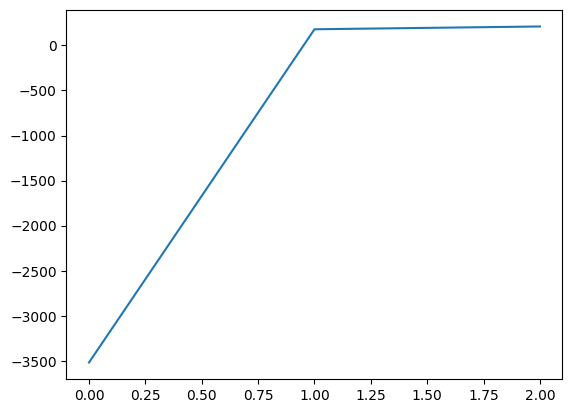

In [26]:
from matplotlib import pyplot as plt
plt.plot(position_draw[2])

In [ ]:

# data preparation


imu_df = pd.read_csv(path)

imu_df['timestamp'] = pd.to_datetime(imu_df['timestamp']).astype('int64')

# Handle any missing data
imu_df.dropna(inplace=True)

# imu start from row 68 and reset index
imu_df = imu_df.iloc[68:,:].reset_index(drop=True)
accel_array = np.array([imu_df['accelerometer_m_s2[0]'], imu_df['accelerometer_m_s2[1]'], imu_df['accelerometer_m_s2[2]']]).reshape(3, -1).T
gyro_array = np.array([imu_df['gyro_rad[0]'], imu_df['gyro_rad[1]'], imu_df['gyro_rad[2]']]).reshape(3, -1).T



# find nearest timestamp for df_imu['timestamp'][0] in df_gt['Time']
# Calculate the absolute difference
df_gt['TimeDifference'] = (df_gt['Time'] - imu_df['timestamp'][0]).abs()
# Find the index of the smallest difference
closest_index = df_gt['TimeDifference'].idxmin()
# Delete the TimeDifference column
df_gt = df_gt.drop(columns=['TimeDifference'])
# Get the row with the closest time
closest_time_row = df_gt.loc[closest_index]
# delete column before ckosest_time_row
df_gt = df_gt.iloc[closest_index:,:].reset_index(drop=True)

# Calculate the absolute difference of last timestamp
df_gt['TimeDifference'] = (df_gt['Time'] - df_imu['timestamp'][len(df_imu)-1]).abs()
# Find the index of the smallest difference
closest_index = df_gt['TimeDifference'].idxmin()
# Delete the TimeDifference column
df_gt = df_gt.drop(columns=['TimeDifference'])
# delete column after ckosest_time_row
df_gt = df_gt.iloc[:closest_index,:].reset_index(drop=True)

# get the initial position and orientation
initial_position = np.array([closest_time_row['pose.position.x'], closest_time_row['pose.position.y'], closest_time_row['pose.position.z']])
#initial_orientation = np.quaternion(closest_time_row['pose.orientation.w'], closest_time_row['pose.orientation.x'], closest_time_row['pose.orientation.y'], closest_time_row['pose.orientation.z'])
# get the initial orientation in euler angle
orientation_x, orientation_y, orientation_z = euler_from_quaternion(closest_time_row['pose.orientation.w'], closest_time_row['pose.orientation.x'], closest_time_row['pose.orientation.y'], closest_time_row['pose.orientation.z'])
initial_orientation = np.array([orientation_x, orientation_y, orientation_z])
# calculate the trajectory
positions, orientations = calculate_trajectory(df_imu['timestamp'], gyro_array, accel_array, initial_position, initial_orientation)
# convert quaternion to euler angle
euler_angles = []

plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
plt.plot(df_imu['timestamp'], positions[:,1])
# plot 2 in the same row
plt.subplot(2,1,2)
plt.plot(df_gt['Time'],df_gt['pose.position.y'])
#plt.plot(positions[:,0], positions[:,1])
# plot the ground truth
#plt.plot(df_gt['pose.position.x'],df_gt['pose.position.y'])


In [ ]:
from segments_generator import  get_pcd_from_rgbd, save_segments_as_csv2, find_nearest_time_row, cam_to_world, save_all_info
from depth_intrinsics import DepthIntrinsics
import os
import cv2
import numpy as np
import json
import pycocotools.mask as mask_util
import numpy as np
import label_color_class
import pandas as pd
import quaternion 
import open3d as o3d
from tqdm import tqdm
from filtering_pc  import cluster_and_filter_points


path_test_position = '/Users/david/Documents/thesis/Thesis_code/data_collection/bag_all/fortesttest2/vrpn_client_node-HaoranDrone-pose.csv'

df_test = pd.read_csv(path_test_position)

label_to_color = label_color_class.label_to_color
# load all segmentation files
path_global='/Users/david/Documents/thesis/Thesis_code/data_collection/data_test'

path_rgb = os.path.join(path_global, 'rgb')
path_depth = os.path.join(path_global, 'depth')
cam_pam_path = os.path.join(path_global, 'cam')
path_annotation = os.path.join(path_global, 'preds')

files = os.listdir(path_annotation)
# file end with .json
files = [file for file in files if file.endswith('.json')]
files.sort()

count = 0
image_id = 0
segments_id = 0



for file_anno in tqdm(files):

    # stop after 10 files
    # load annotation file[0] to test the code
    with open(os.path.join(path_annotation,file_anno), 'r') as file:
        annotation = json.load(file)

    # find rgb and depth image with the same file name with annotation file without extension and after second '.'
    timestamp = file_anno.split('.')[0].split('_')[1] + '.' + file_anno.split('.')[1].split('.')[0]
    file_name = file_anno.split('.')[0] + '.' + file_anno.split('.')[1].split('.')[0]
    file_name_rgb = file_name + '.png'
    file_name_depth = 'depth_' + file_name.split('_')[1] + '.png'
    # load rgb and depth image
    bgr = cv2.imread(os.path.join(path_rgb, file_name_rgb)) # bgr

    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    depth = cv2.imread(os.path.join(path_depth, file_name_depth), -1)

    # load camera parameters
    with open(os.path.join(cam_pam_path,'updated_camera_intrinsics.json') , 'r') as file:
        cam_pam = json.load(file)

    depth_intrin = DepthIntrinsics()
    depth_intrin.width = int(cam_pam['depth_intrin.width'])
    depth_intrin.height = int(cam_pam['depth_intrin.height'])
    depth_intrin.fx = float(cam_pam['depth_intrin.fx'])
    depth_intrin.fy = float(cam_pam['depth_intrin.fy'])
    depth_intrin.ppx = float(cam_pam['depth_intrin.ppx'])
    depth_intrin.ppy = float(cam_pam['depth_intrin.ppy'])
    depth_scale = float(cam_pam['depth_scale'])

    mask_rgb = np.zeros_like(rgb)
    segments_rgb_list = []
    segments_label_list = []
    segments_score_list = []
    segments_pcd_list = []

    masks = annotation['masks']
    bboxes = annotation['bboxes']
    labels = annotation['labels']
    scores = annotation['scores']


    df_row = find_nearest_time_row(df_test, float(timestamp))
    camera_position = np.array([df_row['pose.position.x'], df_row['pose.position.y'], df_row['pose.position.z']]) 
    camera_orientation = np.quaternion(df_row['pose.orientation.w'], df_row['pose.orientation.x'], df_row['pose.orientation.y'], df_row['pose.orientation.z']) 
    # print time and position and orientation
    # print('time: ', timestamp)
    # print('position: ', camera_position)
    # print('orientation: ', quaternion.as_rotation_matrix(camera_orientation))
    segments_recount = 0
    for mask, label, score in zip(masks, labels, scores):

        if score < 0.5: # threshold to filter out low-confidence instances
            continue
        color = label_to_color.get(label)
        mask_decode = mask_util.decode(mask)
        mask_rgb[mask_decode > 0] = color
        segment_rgb = np.zeros_like(rgb)  
        segment_rgb[mask_decode > 0] = color
        segment_pcd = get_pcd_from_rgbd(segment_rgb, depth, depth_intrin, depth_scale, filter_black_points=True)
        # continue when the pcd is not empty
        if segment_pcd.is_empty():
            continue
        #segment_pcd = segment_pcd.voxel_down_sample(voxel_size=0.02) 
        pcd_in_world = cam_to_world(camera_position, camera_orientation, np.asarray(segment_pcd.points))
        if pcd_in_world[:,2].mean() < 0.1:
            continue
        #pcd_in_world = cluster_and_filter_points(pcd_in_world, size_threshold=800)
        pcd = o3d.geometry.PointCloud()
        pcd.points = o3d.utility.Vector3dVector(pcd_in_world)
        # color normarlization
        color = np.asarray(color) / 255.0
        pcd.paint_uniform_color(color)
        if len(pcd_in_world) < 900:
            continue
        
        # add pcd each 20 frames
            # down sample pcd
        print('pcd size', len(pcd.points))
        downpcd = pcd.voxel_down_sample(voxel_size=0.05) 
        print('downpcd size', len(downpcd.points))
        
        
        #downpcd.estimate_normals(
    #search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))
        viewer.add_geometry(downpcd)
        segments_pcd_list.append(np.array(downpcd.points))
        save_all_info(np.array(downpcd.points), timestamp, label, segments_id, segments_recount, image_id, camera_position,
                        output_labels, output_segments, output_timestamps, output_positions)
        segments_recount += 1
        segments_id += 1
        segments_rgb_list.append(segment_rgb)
        segments_label_list.append(label)
        segments_score_list.append(score)
    #print('segments num', segments_pcd_list.__len__())
    # save segments as csv file
    # save when timestamp = 1701885390.3409352
    
    #save_segments_as_csv2(segments_pcd_list, timestamp, output_folder = 'segments/train')
    #save_timestamps(image_id,segments_num,timestamp)
    #save_positions(image_id,segments_id,positiion)
    #save_labels(segment_count,label_number)
    image_id += 1

opt = viewer.get_render_option()
opt.show_coordinate_frame = True
opt.background_color = np.asarray([0, 0, 0])
viewer.run()
viewer.destroy_window()